This notebook includes TCR information pre-processing and clonotype definition

In [1]:
import numpy as np
import pandas as pd

import scanpy as scp
import scirpy as scr
import scvelo as scv
import mudata
import muon as mu
import anndata

import seaborn as sns
from matplotlib import pyplot as plt

from scipy import sparse

from matplotlib import colormaps

import os

In [20]:
adata = scp.read("adata_CD8_velocity_all.h5ad")

print(adata.shape)

(27527, 36601)


In [3]:
mdata = mudata.read_h5mu('../new_data/T_cells.h5mu') 

In [10]:
mdata = mdata[adata.obs.index] # Keep only CD8 cells
mdata = mudata.MuData({"gex": adata, "airr": mdata['airr']})

In [11]:
# Process TCR data
scr.pp.index_chains(mdata)
scr.tl.chain_qc(mdata)

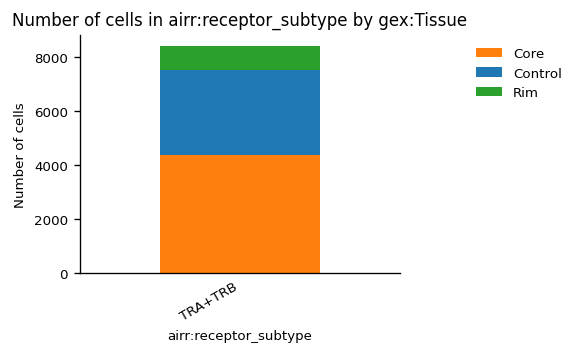

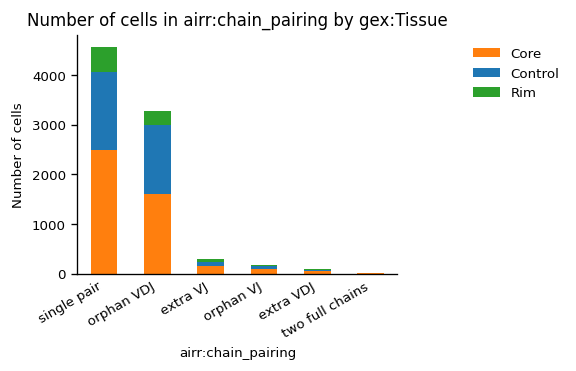

In [12]:
_ = scr.pl.group_abundance(mdata, groupby="airr:receptor_subtype", target_col="gex:Tissue")
_ = scr.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:Tissue")

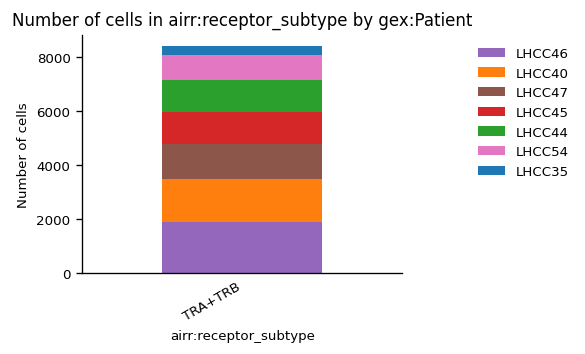

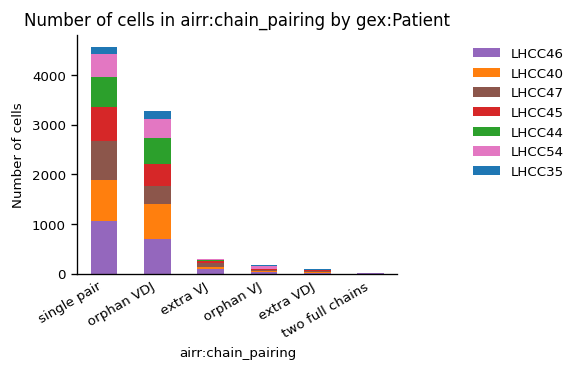

In [13]:
_ = scr.pl.group_abundance(mdata, groupby="airr:receptor_subtype", target_col="gex:Patient")
_ = scr.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:Patient")

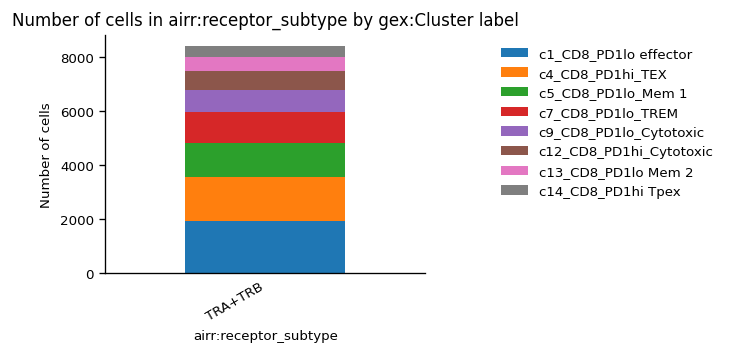

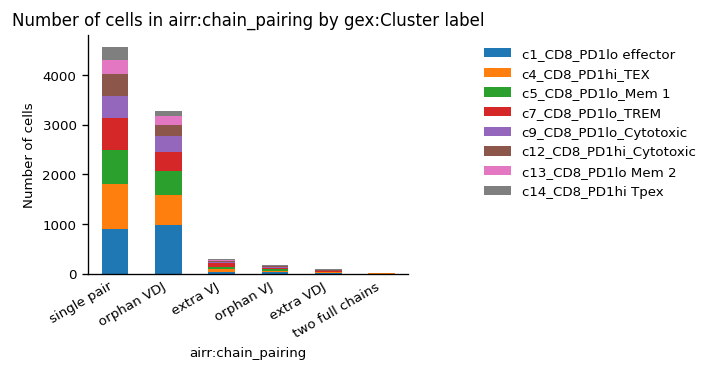

In [14]:
_ = scr.pl.group_abundance(mdata, groupby="airr:receptor_subtype", target_col="gex:Cluster label")
_ = scr.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:Cluster label")

In [17]:
mdata = mdata.copy()

In [18]:
# Filter multichain cells and cells with only one chain
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x != "multichain")
mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"]))

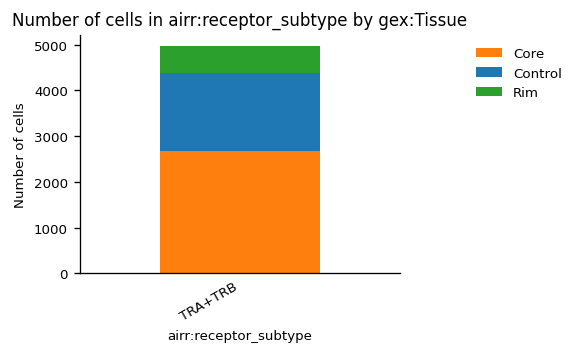

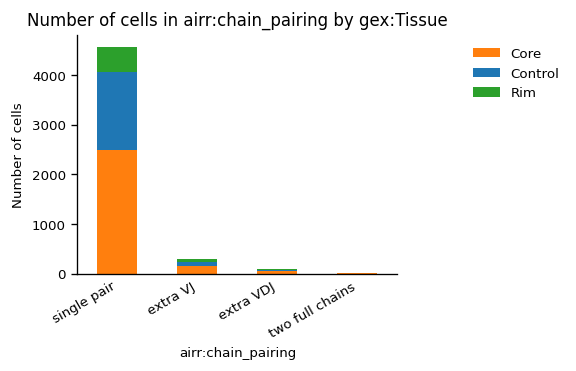

In [19]:
_ = scr.pl.group_abundance(mdata, groupby="airr:receptor_subtype", target_col="gex:Tissue")
_ = scr.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:Tissue")

In [20]:
# Define clonotypes based on identity
scr.pp.ir_dist(mdata)
scr.tl.define_clonotypes(mdata, receptor_arms="all", dual_ir="primary_only")

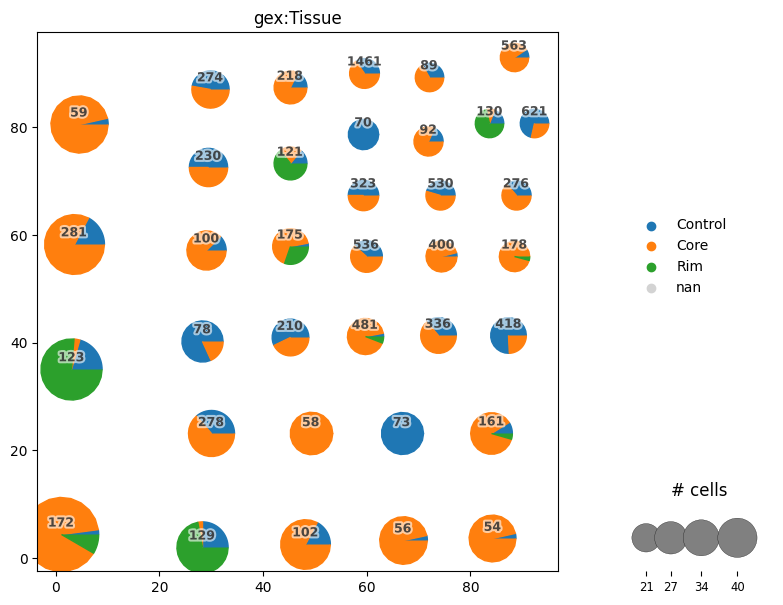

In [23]:
# Plot some of the alrger clonotypes
CLONOTYPE_SIZE = 20
scr.tl.clonotype_network(mdata, min_cells=CLONOTYPE_SIZE)
_ = scr.pl.clonotype_network(mdata, color="gex:Tissue", base_size=20, label_fontsize=9, panel_size=(7, 7))

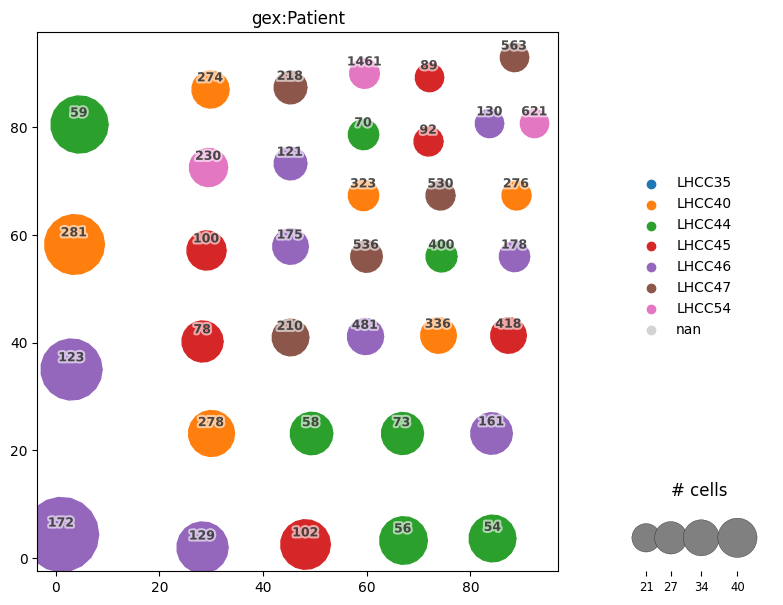

In [24]:
_ = scr.pl.clonotype_network(mdata, color="gex:Patient", base_size=20, label_fontsize=9, panel_size=(7, 7))

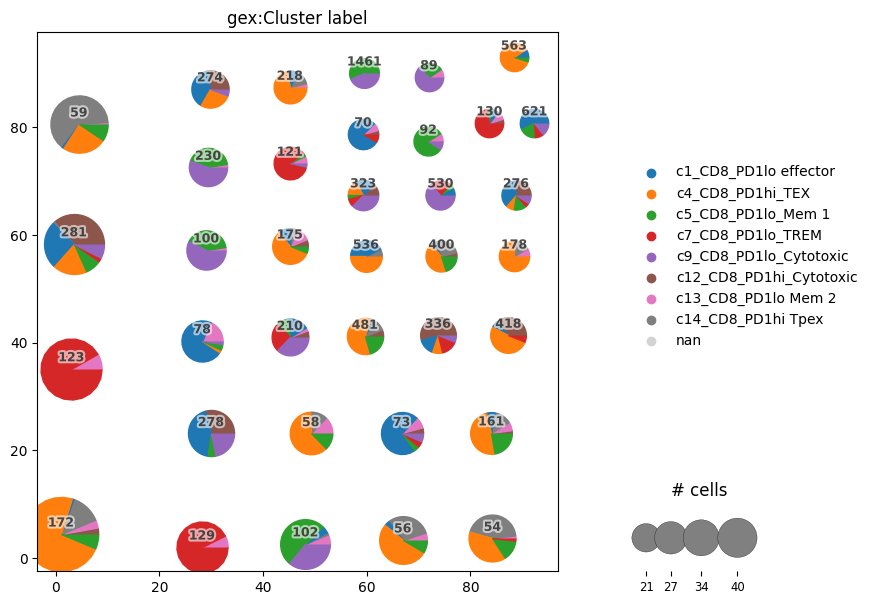

In [25]:
_ = scr.pl.clonotype_network(mdata, color="gex:Cluster label", base_size=20, label_fontsize=9, panel_size=(7, 7))

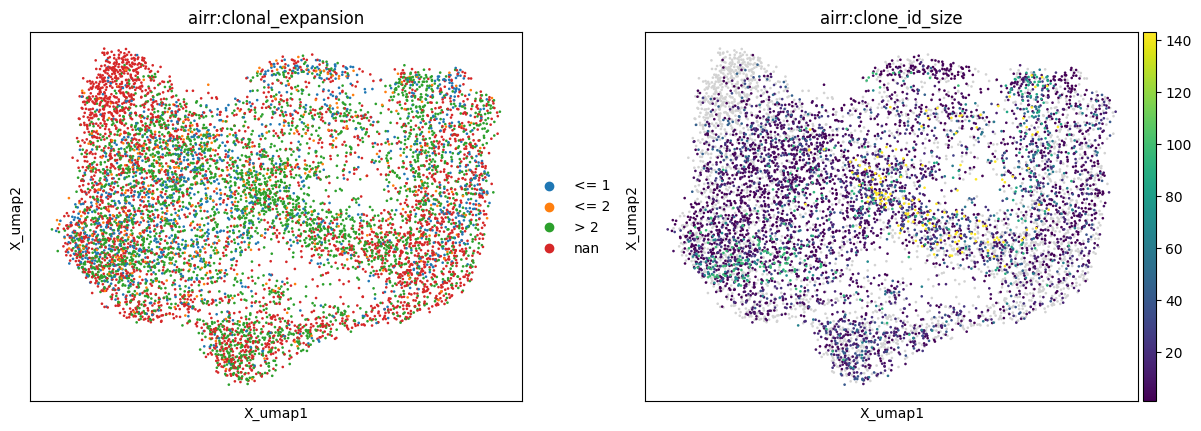

In [26]:
scr.tl.clonal_expansion(mdata)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:clonal_expansion", "airr:clone_id_size"])

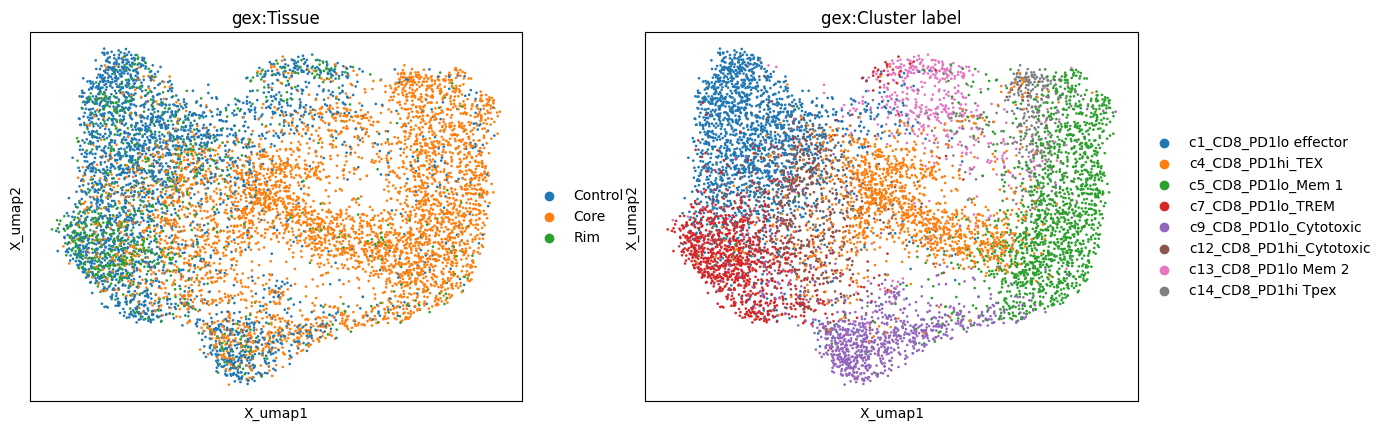

In [27]:
mu.pl.embedding(mdata, basis="gex:umap", color=["gex:Tissue", "gex:Cluster label"])

Text(0, 0.5, '# cells')

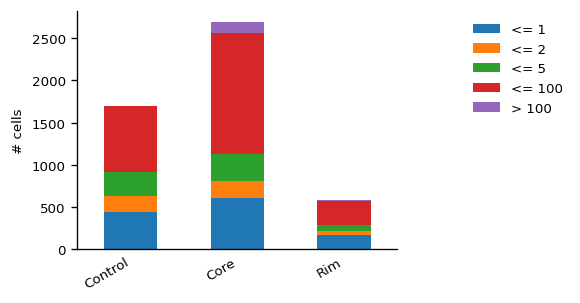

In [29]:
ax = scr.pl.clonal_expansion(mdata, groupby = "gex:Tissue", target_col='clone_id', expanded_in=None, breakpoints=(1, 2, 5, 100), 
                           clip_at=None, summarize_by='cell', normalize=False, show_nonexpanded=True)

ax.set_ylabel('# cells')

Text(0, 0.5, '# clonotypes')

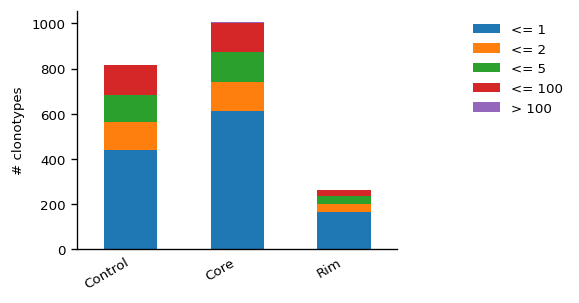

In [30]:
ax = scr.pl.clonal_expansion(mdata, groupby = "gex:Tissue", target_col='clone_id', expanded_in=None, breakpoints=(1, 2, 5, 100), 
                           clip_at=None, summarize_by='clone_id', normalize=False, show_nonexpanded=True)

ax.set_ylabel('# clonotypes')

Text(0, 0.5, '# cells')

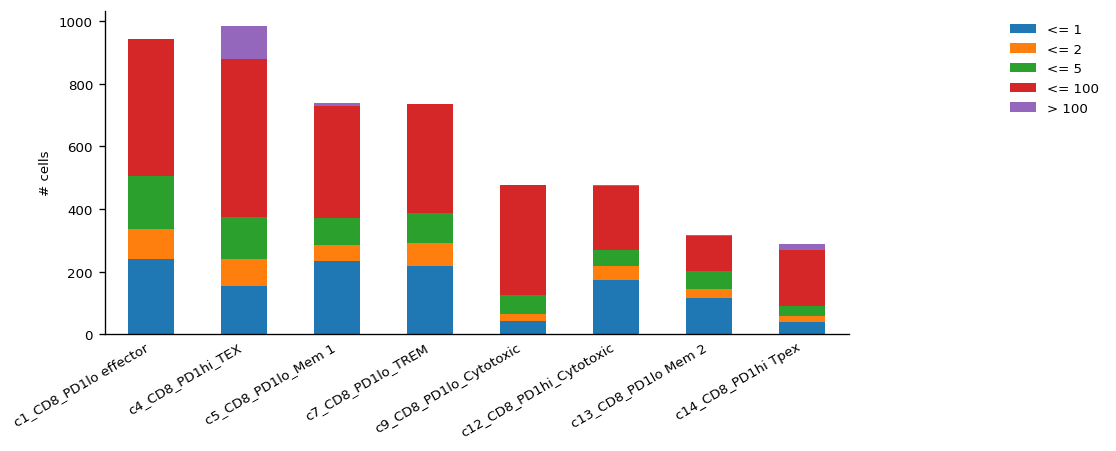

In [31]:
ax = scr.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:Cluster label", breakpoints=(1, 2, 5, 100), 
                            normalize=False, fig_kws = {'figsize': (8, 3.5), 'dpi': 120})

ax.set_ylabel('# cells')

Text(0, 0.5, '% cells')

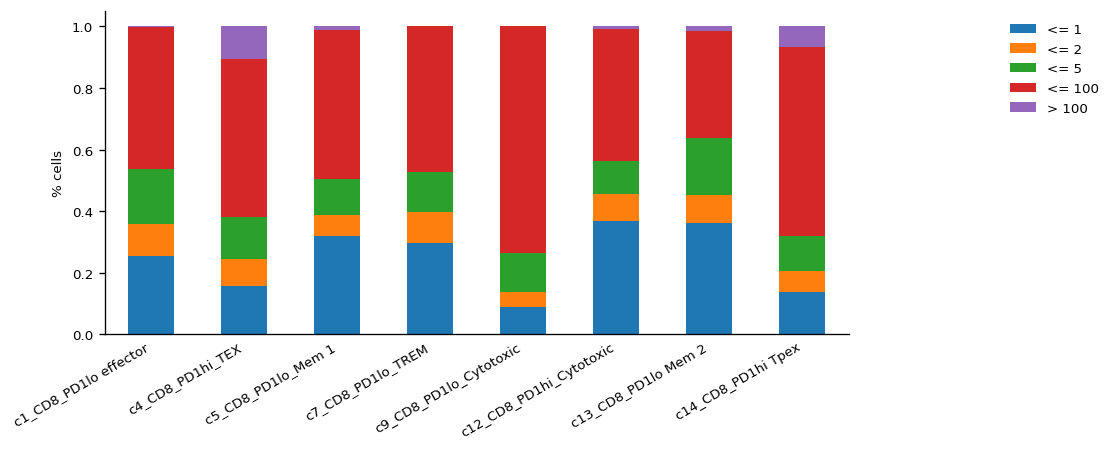

In [32]:
ax = scr.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:Cluster label", breakpoints=(1, 2, 5, 100), 
                            fig_kws = {'figsize': (8, 3.5), 'dpi': 120})

ax.set_ylabel('% cells')

Text(0, 0.5, '# clonotypes')

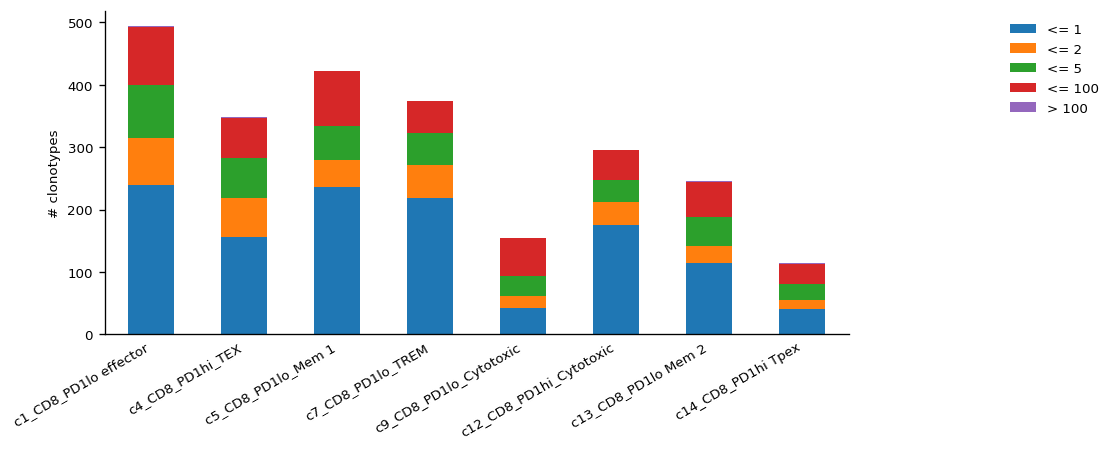

In [33]:
ax = scr.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:Cluster label", breakpoints=(1, 2, 5, 100), 
                            fig_kws = {'figsize': (8, 3.5), 'dpi': 120}, summarize_by='clone_id',  normalize=False)

ax.set_ylabel('# clonotypes')

Text(0, 0.5, '% clonotypes')

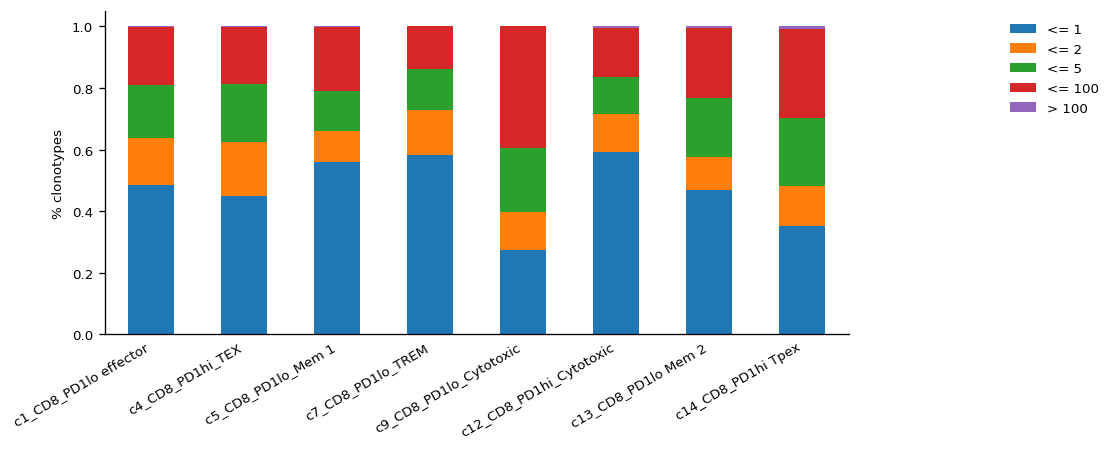

In [34]:
ax = scr.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:Cluster label", breakpoints=(1, 2, 5, 100), 
                            fig_kws = {'figsize': (8, 3.5), 'dpi': 120}, summarize_by='clone_id',  normalize=True)

ax.set_ylabel('% clonotypes')

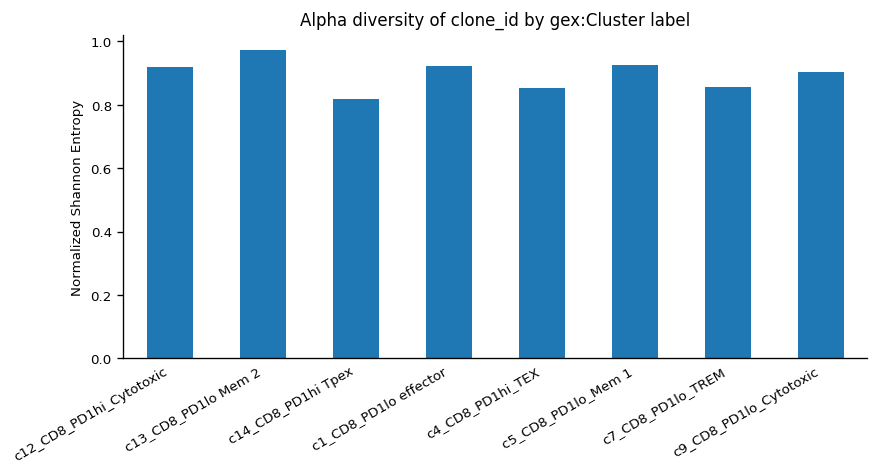

In [35]:
_ = scr.pl.alpha_diversity(mdata, metric="normalized_shannon_entropy", groupby="gex:Cluster label", 
                            fig_kws = {'figsize': (8, 3.5), 'dpi': 120})

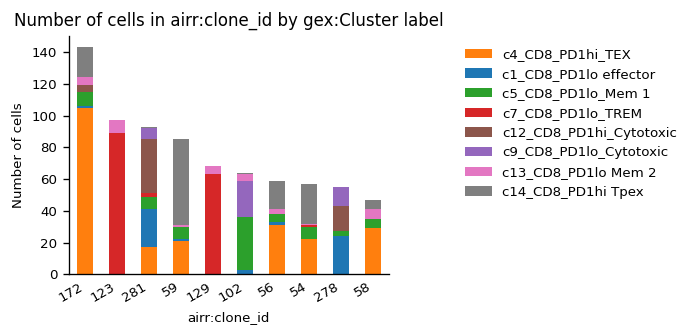

In [36]:
_ = scr.pl.group_abundance(mdata, groupby="airr:clone_id", target_col="gex:Cluster label", max_cols=10)

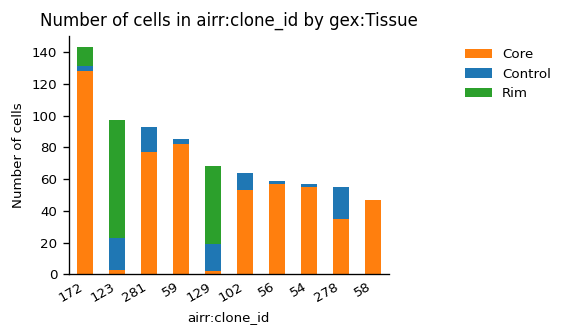

In [39]:
_ = scr.pl.group_abundance(mdata, groupby="airr:clone_id", target_col="gex:Tissue", max_cols=10)

In [50]:
#save identified clonotypes
mdata['airr'].write('TCR_data.h5ad') 